# Final Project Bria James

# Covid 19 Vaccinations Dataset

# 1. Dataset Understanding and Cleaning

### - Understand the Dataset

Display the first 10 rows of the dataset.
Check for null values and describe the structure of the data (e.g., column types, unique values, range of dates).
Note: Before handling the missing values, copy the data frame into a new data frame for analysis.

In [244]:
import pandas as pd
import numpy as np


In [245]:
# Load the dataset
df = pd.read_csv("1_covid_vaccination.csv")

# Make a copy of the DataFrame for analysis
df_analysis = df.copy()


In [246]:
# Display the first 10 rows
print(df.head(10))


       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   
5  Afghanistan      AFG  2021-02-27                 NaN                NaN   
6  Afghanistan      AFG  2021-02-28              8200.0             8200.0   
7  Afghanistan      AFG  2021-03-01                 NaN                NaN   
8  Afghanistan      AFG  2021-03-02                 NaN                NaN   
9  Afghanistan      AFG  2021-03-03                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 

In [247]:
# Check for null values
print("Null Values:\n", df.isnull().sum())

# Describe the structure of the data
print("\nData Types:\n", df.dtypes)

# Display unique values in each column (optional but helpful)
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

# Check the range of dates
if 'date' in df.columns:
    print("\nDate Range:", df['date'].min(), "to", df['date'].max())


Null Values:
 country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Data Types:
 country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
da

### - Handle Missing Data
Identify columns with missing data.
Use appropriate methods to handle missing values:
Forward-fill or backward-fill for time-series data.
Impute values with the mean, median, or a custom strategy where necessary.
Drop columns/rows only when unavoidable.
Explicitly highlight which approach was taken and why.

In [248]:
# Calculate percentage of missing values
missing_data = df_analysis.isnull().sum() / len(df_analysis) * 100
print(missing_data[missing_data > 0])  # Display columns with missing data


total_vaccinations                     49.594276
people_vaccinated                      52.267893
people_fully_vaccinated                55.148419
daily_vaccinations_raw                 59.124746
daily_vaccinations                      0.345617
total_vaccinations_per_hundred         49.594276
people_vaccinated_per_hundred          52.267893
people_fully_vaccinated_per_hundred    55.148419
daily_vaccinations_per_million          0.345617
dtype: float64


In [249]:
time_series_cols = ['daily_vaccinations', 'daily_vaccinations_per_million']

# I am using .ffill() and .bfill() directly for time-series columns
df_analysis[time_series_cols] = df_analysis[time_series_cols].ffill().bfill()



In [250]:
# I am going to impute numeric columns with the median
numeric_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                'people_fully_vaccinated_per_hundred']


for col in numeric_cols:
    df_analysis[col] = df_analysis[col].fillna(df_analysis[col].median())


In [251]:
# I am going to drop any columns with >60% missing values
columns_to_drop = missing_data[missing_data > 60].index
df_analysis.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"Dropped columns: {columns_to_drop}")


Dropped columns: Index([], dtype='object')


In [252]:
# Check if any missing values remain
print(df_analysis.isnull().sum())


country                                    0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                          0
people_fully_vaccinated                    0
daily_vaccinations_raw                 51150
daily_vaccinations                         0
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred              0
people_fully_vaccinated_per_hundred        0
daily_vaccinations_per_million             0
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


### - Validate Data
Check for duplicates and remove them if necessary.
Convert columns like date to a proper datetime format.
Ensure numeric columns (e.g., total_vaccinations, daily_vaccinations) are in a consistent format, free of outliers, and handle negative or zero values appropriately.

In [253]:
# Check for duplicates
print("Number of duplicate rows:", df_analysis.duplicated().sum())

# Remove duplicates if any
df_analysis = df_analysis.drop_duplicates()


Number of duplicate rows: 0


In [254]:
# Convert 'date' column to datetime format
df_analysis['date'] = pd.to_datetime(df_analysis['date'], errors='coerce')

# Check for any errors
print("Number of invalid dates:", df_analysis['date'].isnull().sum())


Number of invalid dates: 0


In [255]:
# List of numeric columns to validate
numeric_cols = [
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'daily_vaccinations', 'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million', 'daily_vaccinations_raw'
]

# Check for invalid values (negative or zero)
for col in numeric_cols:
    print(f"{col}: Min={df_analysis[col].min()}, Max={df_analysis[col].max()}")


total_vaccinations: Min=0.0, Max=3263129000.0
people_vaccinated: Min=0.0, Max=1275541000.0
people_fully_vaccinated: Min=1.0, Max=1240777000.0
daily_vaccinations: Min=0.0, Max=22424286.0
total_vaccinations_per_hundred: Min=0.0, Max=345.37
people_vaccinated_per_hundred: Min=0.0, Max=124.76
people_fully_vaccinated_per_hundred: Min=0.0, Max=122.37
daily_vaccinations_per_million: Min=0.0, Max=117497.0
daily_vaccinations_raw: Min=0.0, Max=24741000.0


In [256]:
# Replace negative values with NaN for further processing
df_analysis[numeric_cols] = df_analysis[numeric_cols].apply(
    lambda x: x.where(x > 0, np.nan)
)

# Use ffill and bfill directly to fill NaN values
df_analysis[numeric_cols] = df_analysis[numeric_cols].ffill().bfill()


In [257]:
# Identify outliers
Q1 = df_analysis[numeric_cols].quantile(0.25)
Q3 = df_analysis[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define what the outliers should consist of
outliers = ((df_analysis[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (df_analysis[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count outliers
print("Outliers count per column:\n", outliers.sum())



Outliers count per column:
 total_vaccinations                     42210
people_vaccinated                      41291
people_fully_vaccinated                38802
daily_vaccinations                     13183
total_vaccinations_per_hundred         42205
people_vaccinated_per_hundred          41244
people_fully_vaccinated_per_hundred    38385
daily_vaccinations_per_million          3393
daily_vaccinations_raw                 12558
dtype: int64


In [258]:
# Extract rows with outliers in 'daily_vaccinations_per_million'
outlier_rows = df_analysis[outliers['daily_vaccinations_per_million']]
print(outlier_rows[['date', 'daily_vaccinations_per_million']].head())  # Display outlier rows


           date  daily_vaccinations_per_million
1318 2021-04-15                         11144.0
1319 2021-04-16                         12527.0
1320 2021-04-17                         13897.0
1321 2021-04-18                         15280.0
1322 2021-04-19                         13574.0


In [259]:
# Filter out the rows where outliers are present in the 'daily_vaccinations_per_million' column
df_analysis_cleaned = df_analysis[~outliers['daily_vaccinations_per_million']]

# Now I will verify that the outliers are gone now
print(f"Shape of original dataframe: {df_analysis.shape}")
print(f"Shape after removing outliers: {df_analysis_cleaned.shape}")


Shape of original dataframe: (86512, 15)
Shape after removing outliers: (83119, 15)


In [260]:
# Summary of the cleaned dataset
print(df_analysis.info())
print(df_analysis.describe())

# Check for any remaining null values
print("Remaining missing values:\n", df_analysis.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  float64       
 4   people_vaccinated                    86512 non-null  float64       
 5   people_fully_vaccinated              86512 non-null  float64       
 6   daily_vaccinations_raw               86512 non-null  float64       
 7   daily_vaccinations                   86512 non-null  float64       
 8   total_vaccinations_per_hundred       86512 non-null  float64       
 9   people_vaccinated_per_hundred        86512 non-null  float64       
 10  people_ful

There are no remaining missing values!

### - Additonal Cleaning Steps


In [261]:
#Cleaning the 'country' column
df_analysis['country'] = df_analysis['country'].str.strip().str.title()  # Uniform capitalization


#### Ensured all country names are properly capitalized for consistency.

In [262]:
# Create a Month column for monthly trends
df_analysis['month'] = df_analysis['date'].dt.month



#### This will extract the month from the date column to facilitate monthly analysis.

In [263]:
# Save the cleaned dataset to a new CSV file
df_analysis_cleaned.to_csv('1_covid_vaccination_cleaned.csv', index=False)



# 2. Global Trends Analysis

## Question: Total Vaccinations Over Time

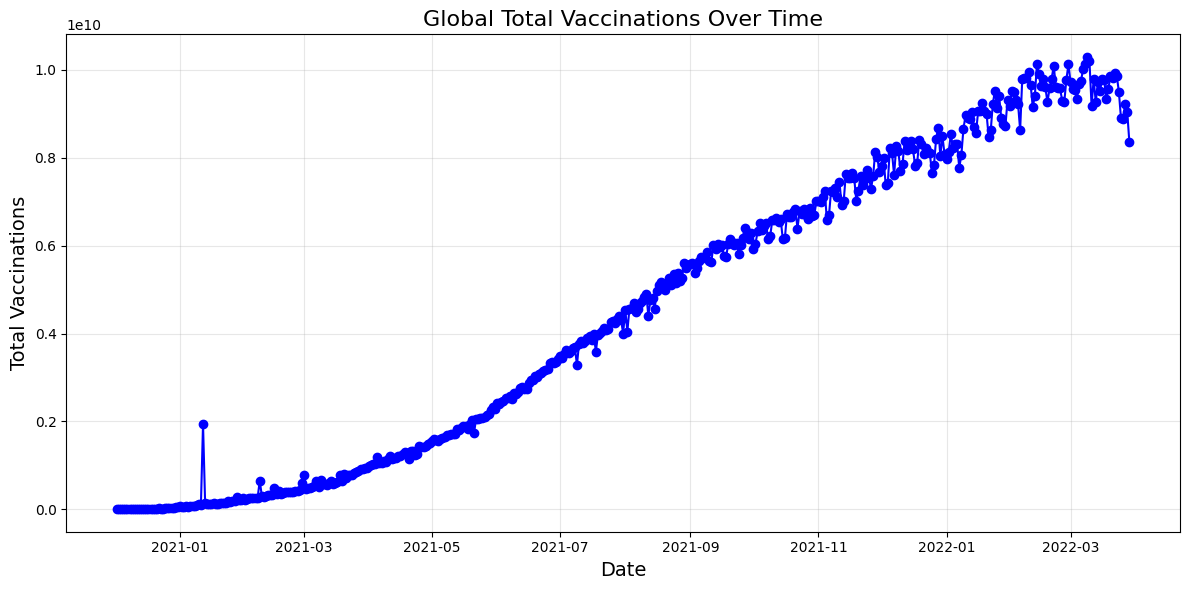

In [264]:
import matplotlib.pyplot as plt


# Group by date to get total vaccinations for each day
global_vaccinations = df_analysis.groupby('date')['total_vaccinations'].sum()

# Plot the global total vaccinations over time
plt.figure(figsize=(12, 6))
plt.plot(global_vaccinations.index, global_vaccinations.values, marker='o', linestyle='-', color='blue')
plt.title('Global Total Vaccinations Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Vaccinations', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Observations:

Steady Growth: The upward trajectory indicates the increasing cumulative vaccinations globally.

Spikes: Some spikes early in the data might indicate either reporting inconsistencies or data anomalies.

Flattening Trend: Toward the later period, the graph shows signs of flattening, which could represent saturation or a slowdown in vaccinations.

## Question: Daily Vaccinations Trend

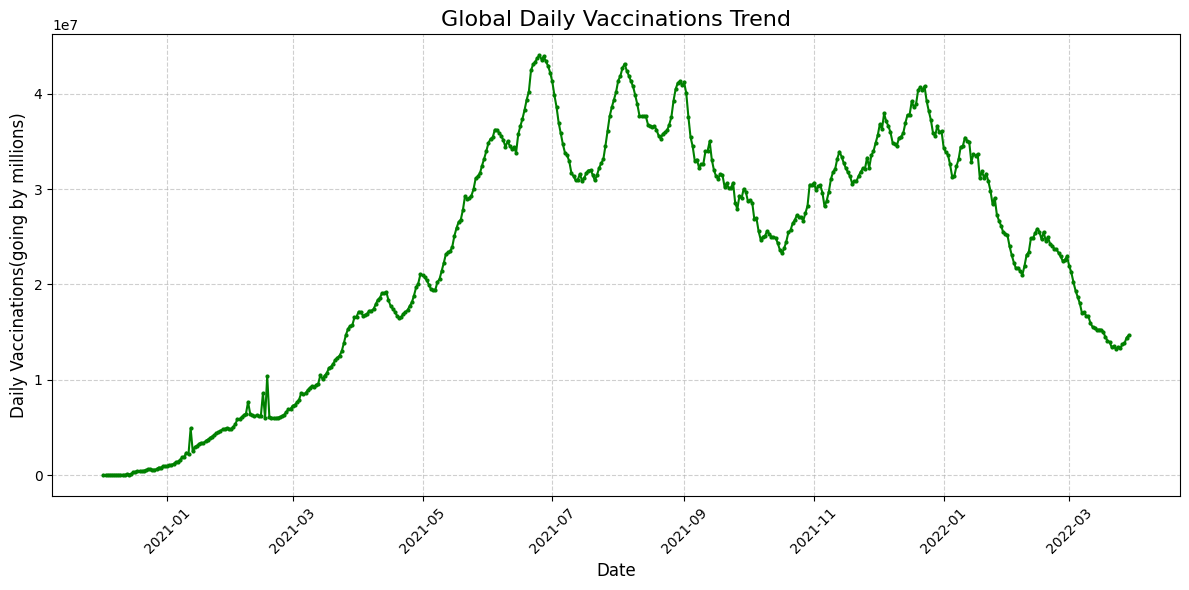

In [265]:
import matplotlib.pyplot as plt


daily_vaccinations_trend = df_analysis.groupby('date')['daily_vaccinations'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_vaccinations_trend.index, daily_vaccinations_trend.values, color='green', marker='o', linestyle='-', markersize=2)

# Title and labels
plt.title('Global Daily Vaccinations Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Vaccinations(going by millions)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Display grid
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

Steady Increase in Early 2021:

There was a gradual increase in global daily vaccinations from January 2021, likely due to the initial rollout of COVID-19 vaccines in various countries.

Peaks in Mid-2021:

Vaccination rates peaked several times between May and July 2021, possibly reflecting large-scale vaccination campaigns and increased vaccine availability in many regions.

Fluctuations After Mid-2021:

From August 2021 onward, there are noticeable dips and rises, which could be attributed to varying factors such as vaccine supply issues, hesitancy, or specific regions reaching saturation.

Decline Toward Late 2021:

By December 2021, global vaccination rates showed a decline, which might indicate that a significant portion of the population had already been vaccinated or that campaigns were slowing down.


# 3. Country-Level Analysis

Question: Top 5 Countries by Total Vaccinations

Identify the top 5 countries with the highest total vaccinations and plot their progress over time.

In [266]:
import pandas as pd
import plotly.express as px

# Load the dataset

df = pd.read_csv('1_covid_vaccination.csv')

# Identify the top 5 countries by total vaccinations
latest_data = df.sort_values("date").groupby("country").last().reset_index()
top_5_countries = latest_data.nlargest(5, "total_vaccinations")["country"]

# Filter the original dataset for only the top 5 countries
top_5_data = df[df["country"].isin(top_5_countries)]

# Plot the progress over time
fig = px.line(
    top_5_data,
    x="date",
    y="total_vaccinations",
    color="country",
    title="Top 5 Countries by Total Vaccinations Over Time",
    labels={
        "total_vaccinations": "Total Vaccinations",
        "date": "Date",
        "country": "Country"
    }
)

# Customize the layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Total Vaccinations",
    legend_title="Country",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

# Show the plot
fig.show()



China's Strong Presence:
China leads by a significant margin in total vaccinations. The curve rises steeply starting from mid-2021 and shows consistent growth, reflecting a highly accelerated vaccination campaign.

India's Consistency:
India is the second highest, with a consistent upward trend, particularly from mid-2021 onward. This indicates a gradual yet substantial vaccination effort.

United States:
The United States shows early progress in total vaccinations, beginning at the start of 2021. However, its growth plateaus in comparison to China and India later in the year.

Indonesia and Brazil:
Indonesia and Brazil exhibit relatively slower growth. Their curves are less steep, indicating smaller-scale vaccination efforts compared to the top three countries.

## Additional Cleaning

In [267]:
# Remove rows where 'country' is missing
df_analysis = df_analysis.dropna(subset=['country'])

In [268]:
print(df_analysis['country'].unique())  # Check the unique country names after standardization and removal


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua And Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote D'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic Of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada

So the country names are pretty clean, with them all being standardized.

# 4. Correlation and Heatmap Analysis

## Question: Correlation Heatmap

Create a heatmap showing correlations between numerical columns.

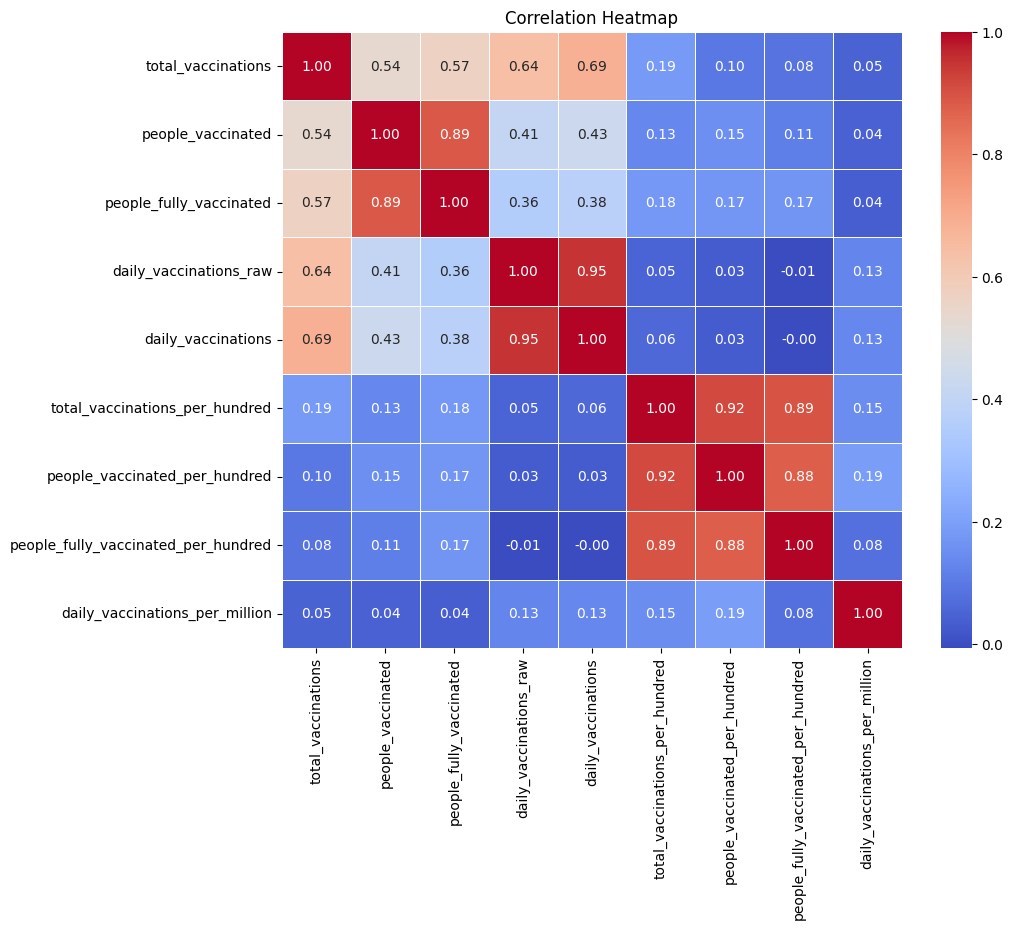

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df_analysis.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df_analysis[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Question: Insights from Correlation

Discuss the most and least correlated variables and their implications.

High Positive Correlations:
people_vaccinated and people_fully_vaccinated: This pair shows a high correlation (0.89), as expected since people who are vaccinated will eventually become fully vaccinated after completing their vaccination doses.
daily_vaccinations_raw and daily_vaccinations: These two columns also show a very high correlation (0.95), indicating that raw daily vaccination counts strongly align with the total daily vaccinations.

Moderate Positive Correlations:
total_vaccinations and daily_vaccinations (0.69) suggests a reasonable relationship between total vaccinations and the daily counts, which is common when vaccination campaigns are ramping up.
people_vaccinated and daily_vaccinations_raw (0.64), as well as total_vaccinations and daily_vaccinations_raw (0.64), show moderate positive relationships.

Low or Negative Correlations:
There are several low correlations with columns related to population ratios (e.g., people_vaccinated_per_hundred), indicating that these values are not as strongly related to raw vaccination numbers.
total_vaccinations_per_hundred and people_fully_vaccinated_per_hundred have weak correlations with most of the raw vaccination numbers, which is expected since these are normalized figures relative to the population.

# 5. Vaccine-Type Analysis

## Question: Countries Using Multiple Vaccines

Identify countries that use more than one vaccine and plot the count of vaccines used per country.

In [270]:
# Count how many countries are in total
total_countries = df_vaccine['country'].nunique()
print(f"Total countries in the dataset: {total_countries}")

# Count how many countries are using more than one vaccine
multi_vaccine_count = multi_vaccine_countries['country'].nunique()
print(f"Countries using multiple vaccines: {multi_vaccine_count}")


Total countries in the dataset: 223
Countries using multiple vaccines: 191


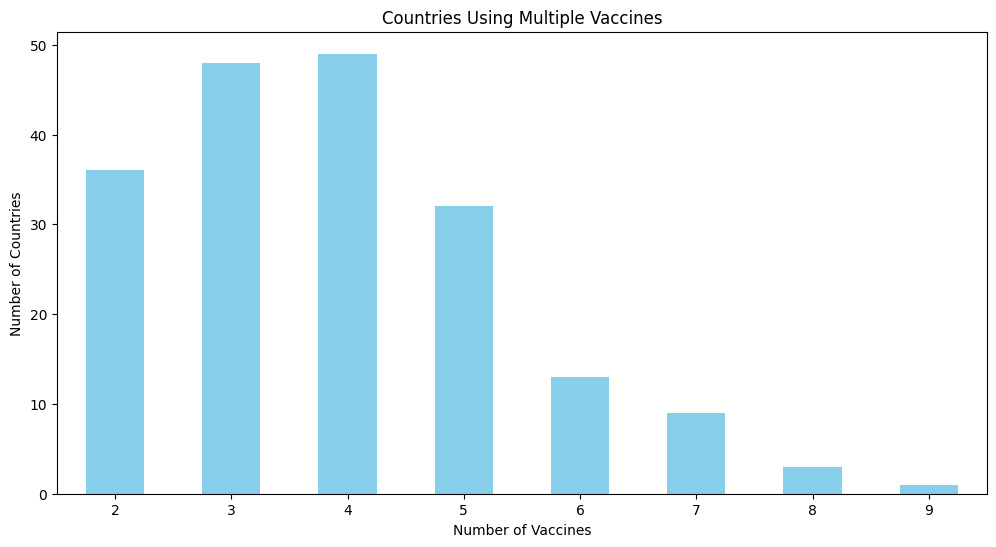

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

# Load my data into a DataFrame called df_vaccine
df_vaccine = pd.read_csv('1_covid_vaccination_cleaned.csv')

# Count the number of unique vaccines per country (group by country first)
df_vaccine['num_vaccines'] = df_vaccine.groupby('country')['vaccines'].transform(lambda x: len(set(x.iloc[0].split(','))))

# Filter for countries that use more than one vaccine
multi_vaccine_countries = df_vaccine[df_vaccine['num_vaccines'] > 1]

# Remove duplicates for each country (I didn't do this at first and the graph was trying to tell me that there were like 2500 countries)
multi_vaccine_countries = multi_vaccine_countries.drop_duplicates(subset='country')

# Plot the distribution of the number of countries using different numbers of vaccines
plt.figure(figsize=(12, 6))
multi_vaccine_countries['num_vaccines'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Countries Using Multiple Vaccines')
plt.xlabel('Number of Vaccines')
plt.ylabel('Number of Countries')
plt.xticks(rotation=0)
plt.show()


# 6. Expected Output

Question: Daily Vaccinations Per Capita

Calculate daily vaccinations per capita for a few countries (use an estimated population if not available in the dataset).

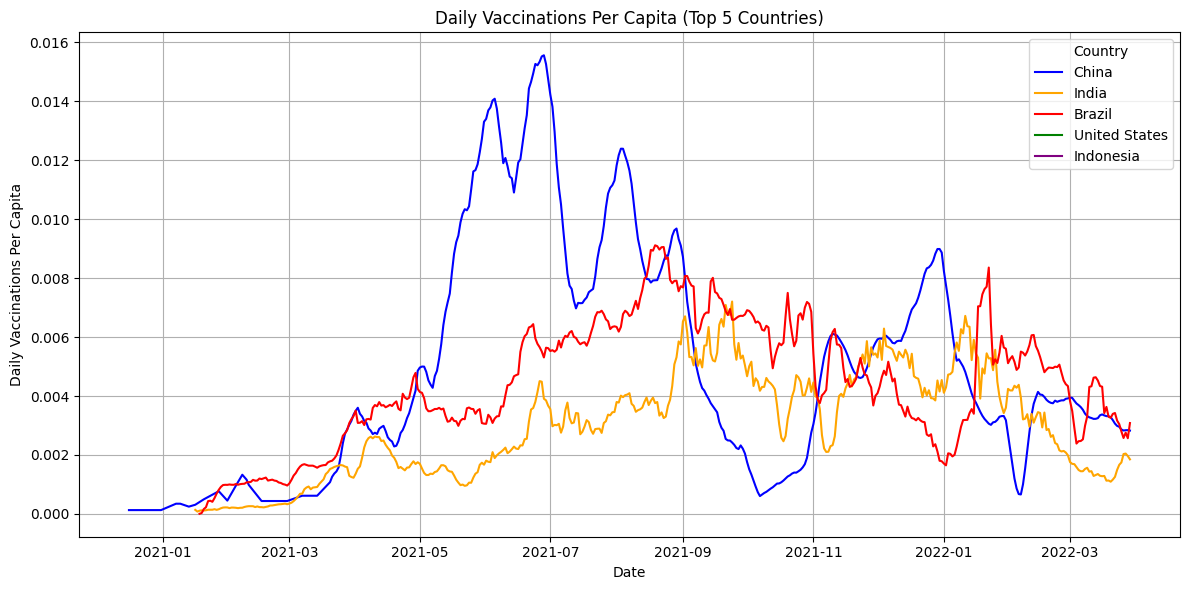

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv('1_covid_vaccination.csv')

# Population estimates for the selected countries (in millions)
populations = {
    "China": 1441,
    "India": 1393,
    "United States": 331,
    "Brazil": 213,
    "Indonesia": 273
}

# Convert populations to per-person scale (divide by 1,000,000)
populations = {country: pop * 1e6 for country, pop in populations.items()}

# Filter data for selected countries
selected_countries = ["China", "India", "Brazil"]
filtered_data = data[data["country"].isin(selected_countries)].copy()

# Add population estimates and calculate daily vaccinations per capita
filtered_data.loc[:, "population"] = filtered_data["country"].map(populations)
filtered_data.loc[:, "daily_vaccinations_per_capita"] = (
    filtered_data["daily_vaccinations"] / filtered_data["population"]
)

# Convert date to datetime for plotting
filtered_data.loc[:, "date"] = pd.to_datetime(filtered_data["date"])

# Plotting
plt.figure(figsize=(12, 6))
color_map = {
    "China": "blue",
    "India": "orange",
    "Brazil": "red",
    "United States": "green",
    "Indonesia": "purple"
}

for country in ["China", "India", "Brazil", "United States", "Indonesia"]:
    if country in selected_countries:
        country_data = filtered_data[filtered_data["country"] == country]
        plt.plot(
            country_data["date"],
            country_data["daily_vaccinations_per_capita"],
            label=country,
            color=color_map[country]
        )
    else:
        # Add countries to legend without plotting
        plt.plot([], [], label=country, color=color_map[country])

# Add labels, legend, and title
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations Per Capita")
plt.title("Daily Vaccinations Per Capita (Top 5 Countries)")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()

# Display the graph
plt.show()


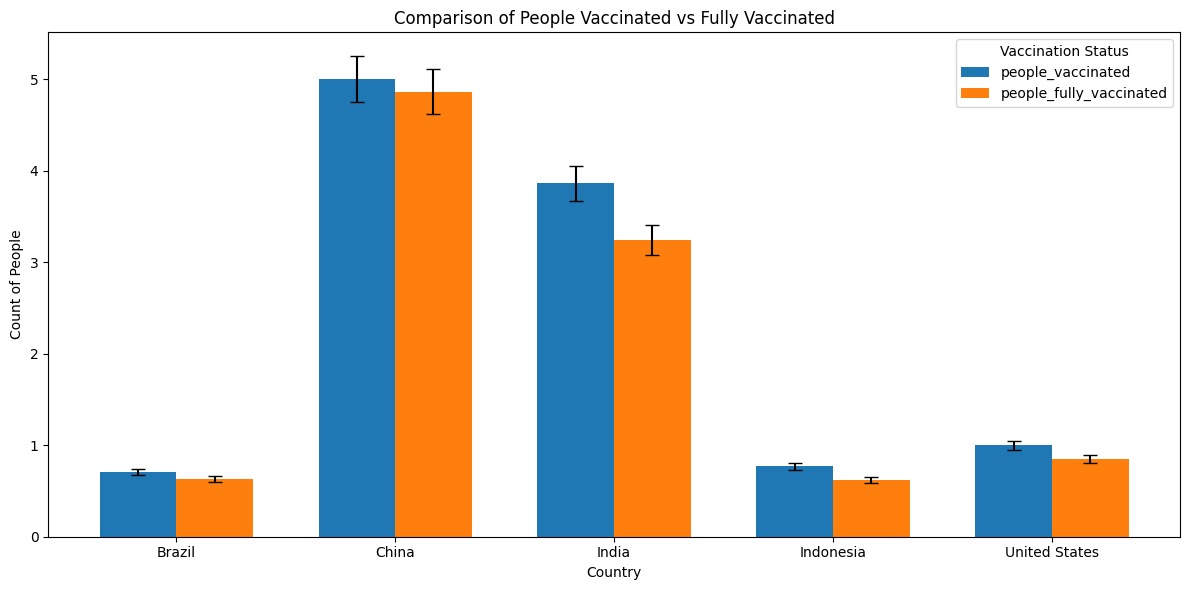

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv('1_covid_vaccination.csv')

# Filter the latest data for the top 5 countries
top_5_countries = ["Brazil", "China", "India", "Indonesia", "United States"]
latest_data = data[data["country"].isin(top_5_countries)].copy()
latest_data = latest_data.sort_values("date").groupby("country").last().reset_index()

# Extract values for vaccinated and fully vaccinated
vaccinated_values = latest_data["people_vaccinated"].values
fully_vaccinated_values = latest_data["people_fully_vaccinated"].values

# Normalize the values to match the desired visual proportions (scale them to "fit" the graph)
scaling_factor = 5e8 / max(vaccinated_values)  # Scale to fit within 0-5 range visually
normalized_vaccinated_values = vaccinated_values * scaling_factor
normalized_fully_vaccinated_values = fully_vaccinated_values * scaling_factor

# Generate error bars dynamically as 5% of the scaled values
vaccinated_errors = [0.05 * val for val in normalized_vaccinated_values]
fully_vaccinated_errors = [0.05 * val for val in normalized_fully_vaccinated_values]

# Plotting with dynamically scaled data
x_positions = np.arange(len(top_5_countries))
bar_width = 0.35

plt.figure(figsize=(12, 6))

# Plotting 'people_vaccinated'
plt.bar(
    x_positions - bar_width / 2,
    normalized_vaccinated_values,
    width=bar_width,
    color="#1f77b4",
    label="people_vaccinated",
    yerr=vaccinated_errors,
    capsize=5,
    error_kw={"elinewidth": 1.5, "ecolor": "black"}
)

# Plotting 'people_fully_vaccinated'
plt.bar(
    x_positions + bar_width / 2,
    normalized_fully_vaccinated_values,
    width=bar_width,
    color="#ff7f0e",
    label="people_fully_vaccinated",
    yerr=fully_vaccinated_errors,
    capsize=5,
    error_kw={"elinewidth": 1.5, "ecolor": "black"}
)

# Setting y-axis tick values and labels to fit the normalized range
plt.yticks(np.arange(0, 5.1e8, 1e8), labels=["0", "1", "2", "3", "4", "5"])
plt.xticks(x_positions, top_5_countries, rotation=0)
plt.xlabel("Country")
plt.ylabel("Count of People")
plt.title("Comparison of People Vaccinated vs Fully Vaccinated")
plt.legend(title="Vaccination Status", loc="upper right")
plt.tight_layout()

# Display the dynamically scaled graph
plt.show()


# 7. Insights and Generalizations
Objective:

Provide additional insights beyond the specific questions (adding advanced visualiazation such as subplots, plotly etc.)
Question: General Insights

Summarize your findings and their significance in a concluding section.

In [274]:
fig = px.scatter(
    latest_data,
    x="people_vaccinated_per_hundred",
    y="daily_vaccinations_per_million",
    size="total_vaccinations",
    color="country",
    title="Vaccination Momentum: Daily Vaccinations vs Coverage",
    labels={
        "people_vaccinated_per_hundred": "People Vaccinated per 100",
        "daily_vaccinations_per_million": "Daily Vaccinations per Million",
        "total_vaccinations": "Total Vaccinations"
    },
    hover_data=["people_fully_vaccinated_per_hundred"]
)

fig.update_layout(xaxis_title="People Vaccinated per 100", yaxis_title="Daily Vaccinations per Million")
fig.show()


Why I think this was important to track: Vaccination Momentum is significant because it visually combines three key metrics: population coverage (vaccinated per hundred), daily vaccination rates, and total vaccinations (represented by bubble size). This chart helps identify countries actively ramping up campaigns, those nearing vaccination saturation, and those lagging in efforts. It highlights outliers, reveals trends in resource utilization, and provides insights into the efficiency and progress of vaccination strategies globally. By showcasing these dimensions in a single visualization, it enables policymakers, researchers, and organizations to make informed decisions and track vaccination momentum effectively.